In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./data/pierce_county_house_sales.csv')
print(df.shape)
df.head()

(16814, 19)


,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,interior,stories,roof_cover,year_built,bedrooms,bathrooms,waterfront_type,view_quality,utility_sewer
0,2020-01-02,380000,2157,0,0,528,0,0,Warm and Cool Air Zone,Frame Siding,Drywall,2,Composition Shingle,1993,3,3,NaN,NaN,SEWER/SEPTIC INSTALLED
1,2020-01-02,383000,2238,0,0,396,0,0,Forced Air,Frame Siding,Drywall,2,Composition Shingle,2017,4,3,NaN,NaN,SEWER/SEPTIC INSTALLED
2,2020-01-01,419900,1452,0,0,0,0,1,Forced Air,Frame Siding,Drywall,1,Built Up Rock,1965,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED
3,2020-01-02,251660,832,0,0,0,0,0,Forced Air,Frame Vinyl,Drywall,1,Composition Shingle,1919,2,1,NaN,NaN,SEWER/SEPTIC INSTALLED
4,2020-01-02,500000,1780,0,384,484,0,1,Forced Air,Frame Siding,Drywall,1,Composition Shingle,1955,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED


In [3]:
df.columns

Index(['sale_date', 'sale_price', 'house_square_feet',
       'attic_finished_square_feet', 'basement_square_feet',
       'attached_garage_square_feet', 'detached_garage_square_feet',
       'fireplaces', 'hvac_description', 'exterior', 'interior', 'stories',
       'roof_cover', 'year_built', 'bedrooms', 'bathrooms', 'waterfront_type',
       'view_quality', 'utility_sewer'],
      dtype='object')

In [4]:
num = [ 'sale_price','house_square_feet',
       'attic_finished_square_feet', 'basement_square_feet',
       'attached_garage_square_feet', 'detached_garage_square_feet',
        'year_built', 'bedrooms', 'bathrooms', 'fireplaces','stories' , ]

cat = ['hvac_description', 'exterior', 'interior', 
       'roof_cover',]
ohc = []
for var in cat:
    ohc.append( pd.get_dummies( df[var], drop_first=True, dtype=int) )
ohc = pd.concat(ohc,axis=1)

ohc.head()
#X = df.loc[:, vars]
#X.head()

D = pd.concat([df.loc[:,num], ohc],axis=1)

print( D.shape )
D = D.dropna(axis=0)
print(D.shape)

y = D['sale_price']
X = D.drop('sale_price',axis=1)

def maxmin(z):
    z = (z - min(z))/(max(z)-min(z))
    return z
X = X.apply(maxmin)

X['intercept'] = 1



(16814, 40)
(16814, 40)


In [5]:
import statsmodels.api as sm
OLS = sm.OLS(y,X).fit()
OLS.summary(alpha=.1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     330.4
Date:                Fri, 11 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:47:10   Log-Likelihood:            -2.2709e+05
No. Observations:               16814   AIC:                         4.543e+05
Df Residuals:                   16774   BIC:                         4.546e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|       [0.05       0.95]
-----------------------------------------------------------------------------------------------
house_square_feet            1.626e+06   3.12e+04     52.184      0.000    1.57e+06    1.68e+06
attic_finished_square_feet   1.964e+05   1.71e+04     11.516      0.000    1.68e+05    2.24e+05
basement_square_feet         5.372e+05   1.46e+04     36.707      0.000    5.13e+05    5.61e+05
attached_garage_square_feet  2.097e+05   1.95e+04     10.746      0.000    1.78e+05    2.42e+05
detached_garage_square_feet  3.038e+05   3.16e+04      9.614      0.000    2.52e+05    3.56e+05
year_built                  -3.077e+04   8705.001     -3.535      0.000   -4.51e+04   -1.65e+04
bedrooms                    -1.088e+06    5.1e+04    -21.319      0.000   -1.17e+06      -1e+06
bathrooms                    1.731e+05   2.36e+04      7.327      0.000    1.34e+05    2.12e+05
fireplaces                   9.555e+04   1.34e+04      7.108      0.000    7.34e+04    1.18e+05
stories                     -1.095e+05   1.06e+04    -10.317      0.000   -1.27e+05    -9.2e+04
Electric Baseboard           -4.83e+05   6.35e+04     -7.607      0.000   -5.87e+05   -3.79e+05
Floor Wall Furnace          -4.772e+05   1.89e+05     -2.527      0.012   -7.88e+05   -1.67e+05
Floor/Wall Furnace           -4.98e+05   6.48e+04     -7.679      0.000   -6.05e+05   -3.91e+05
Forced Air                  -5.017e+05   6.35e+04     -7.903      0.000   -6.06e+05   -3.97e+05
Heat Pump                   -4.479e+05   6.36e+04     -7.041      0.000   -5.52e+05   -3.43e+05
Hot Water Baseboard         -4.911e+05   6.52e+04     -7.532      0.000   -5.98e+05   -3.84e+05
No Heat                     -5.315e+05   6.58e+04     -8.076      0.000    -6.4e+05   -4.23e+05
Warm and Cool Air Zone      -4.552e+05   6.37e+04     -7.146      0.000    -5.6e+05    -3.5e+05
Cedar Finished Cabin        -1.129e+06    1.3e+05     -8.670      0.000   -1.34e+06   -9.15e+05
Cedar Unfinished Cabin      -9.702e+05   1.64e+05     -5.904      0.000   -1.24e+06      -7e+05
Finished Cottage            -9.184e+05   1.09e+05     -8.462      0.000    -1.1e+06    -7.4e+05
Frame Hardboard             -1.127e+06   1.19e+05     -9.491      0.000   -1.32e+06   -9.32e+05
Frame Rustic Log             -7.66e+05   1.12e+05     -6.817      0.000   -9.51e+05   -5.81e+05
Frame Siding                -1.103e+06   1.06e+05    -10.400      0.000   -1.28e+06   -9.28e+05
Frame Stucco                -1.028e+06   1.07e+05     -9.603      0.000    -1.2e+06   -8.52e+05
Frame Vinyl                 -1.148e+06   1.06e+05    -10.816      0.000   -1.32e+06   -9.73e+05
Log                         -5.825e+05   1.17e+05     -4.984      0.000   -7.75e+05    -3.9e+05
Masonry Common Brick        -1.075e+06   1.07e+05    -10.064      0.000   -1.25e+06   -8.99e+05
Masonry Concrete Block      -1.097e+06   1.09e+05    -10.029      0.000   -1.28e+06   -9.17e+05
Pine A-Fram

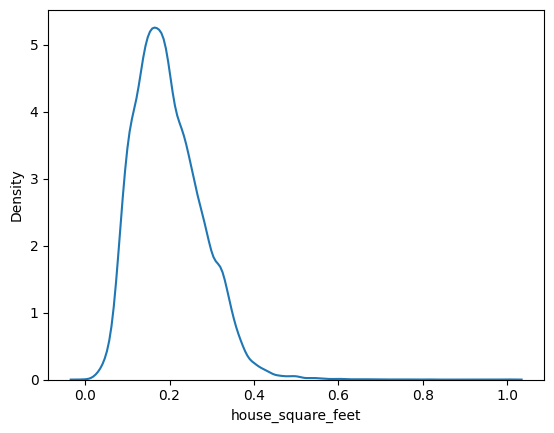

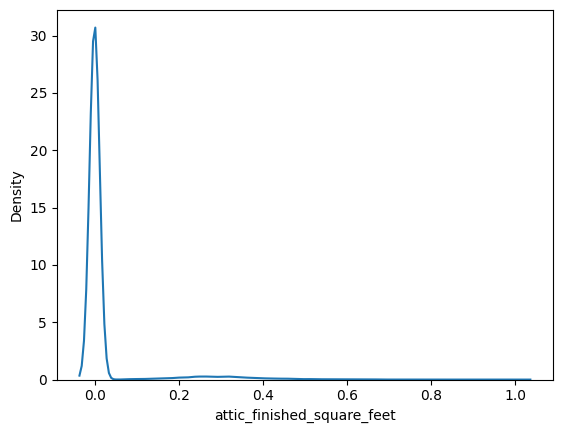

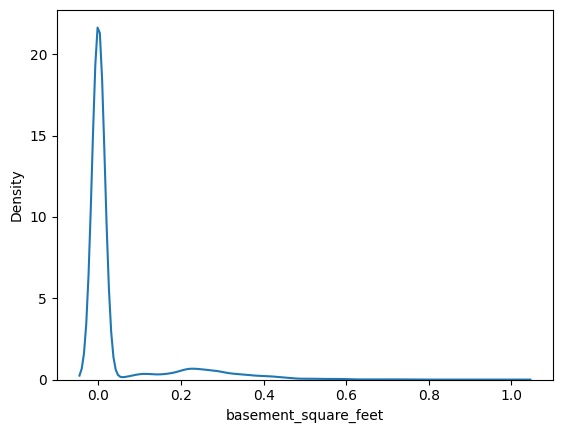

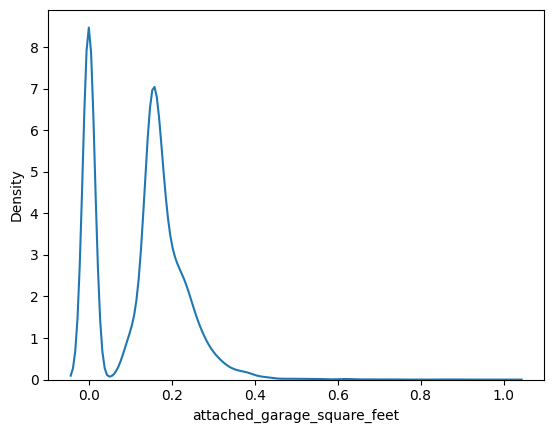

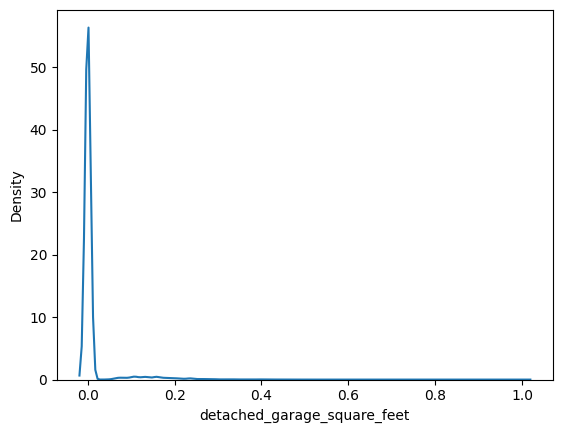

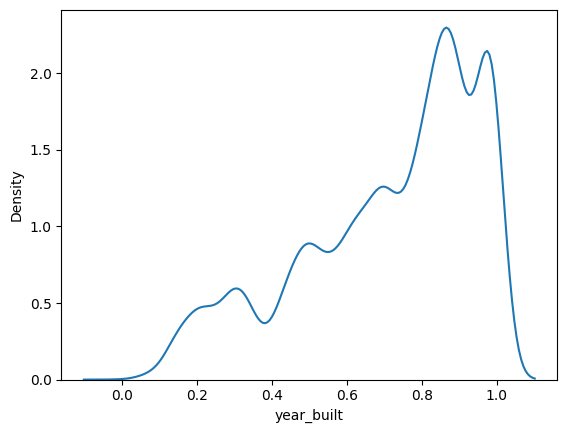

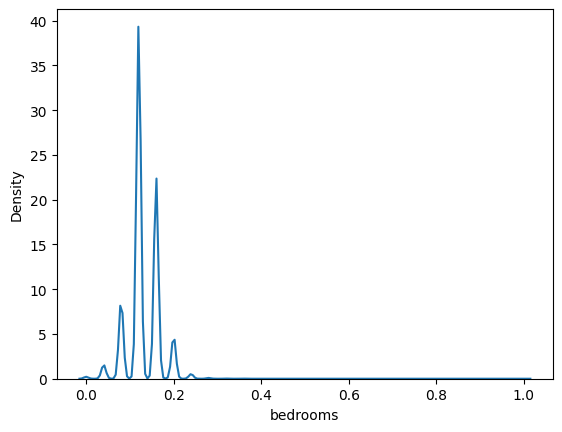

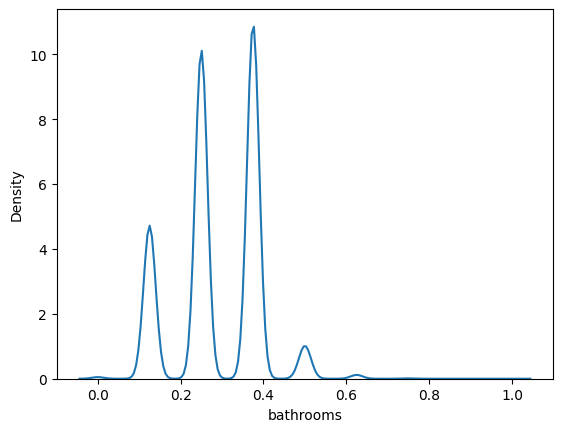

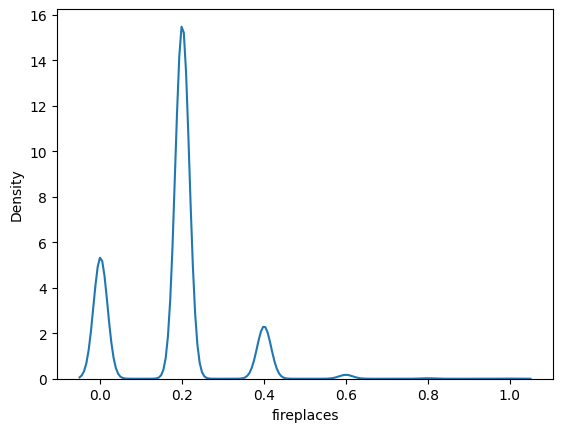

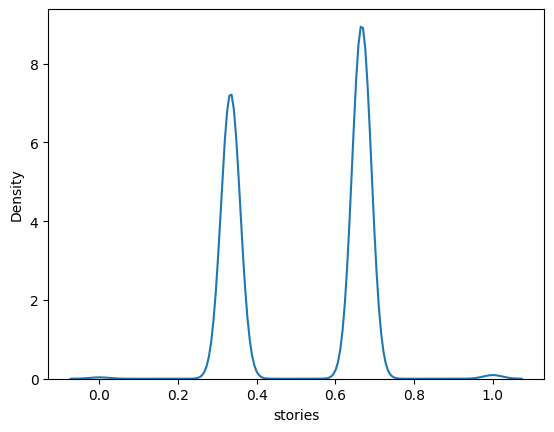

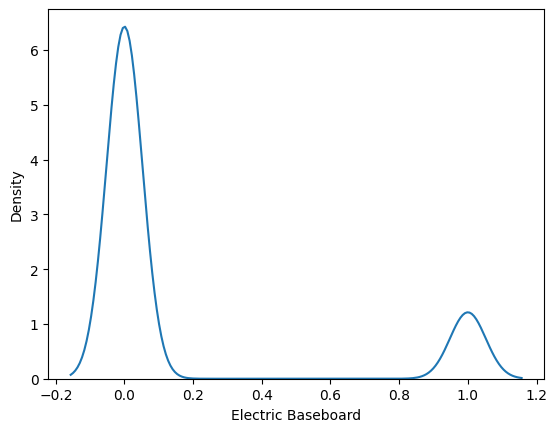

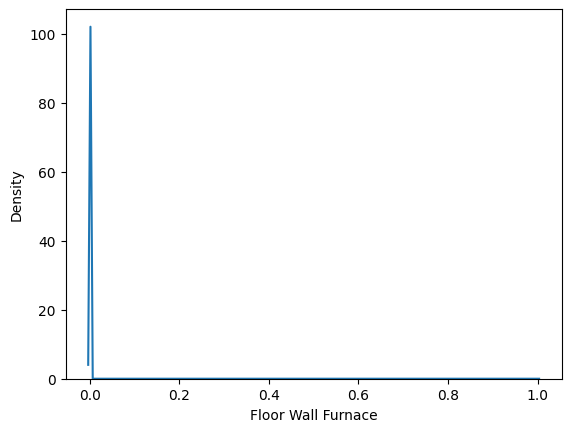

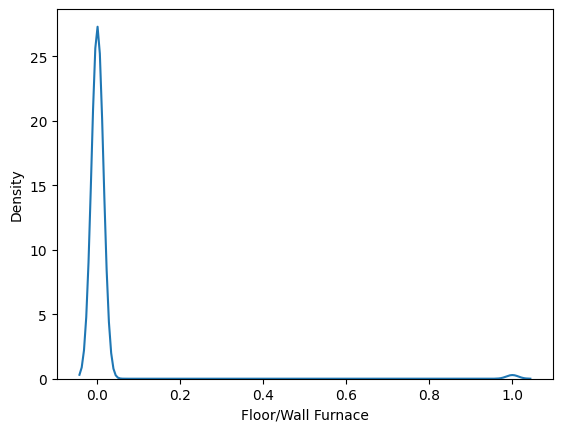

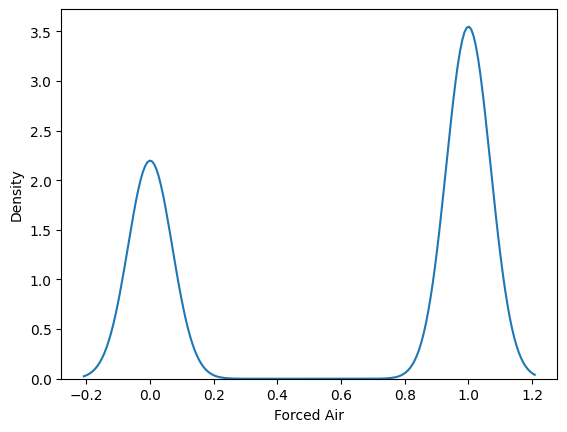

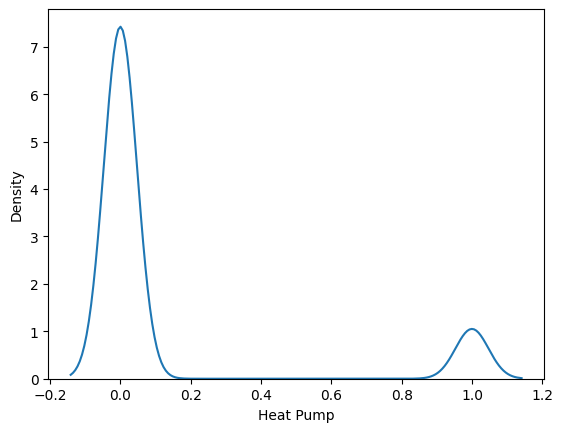

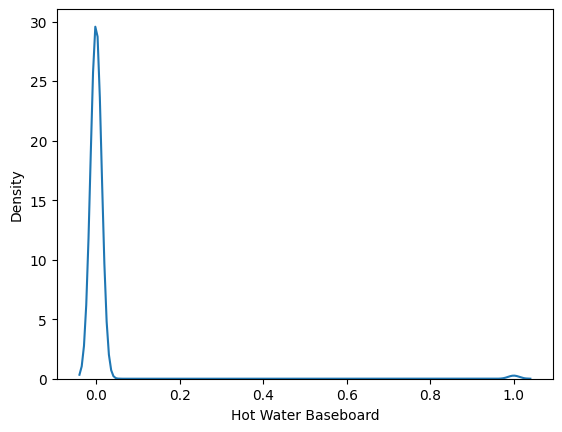

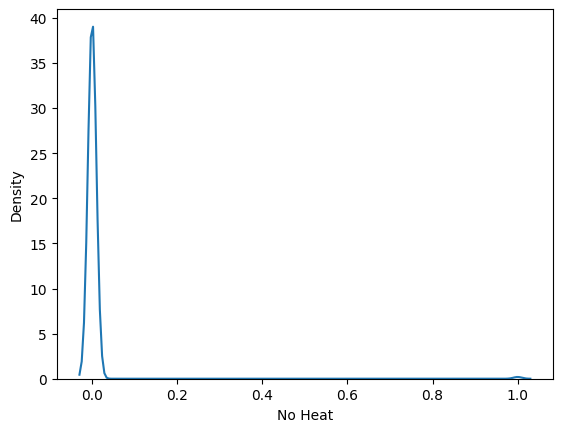

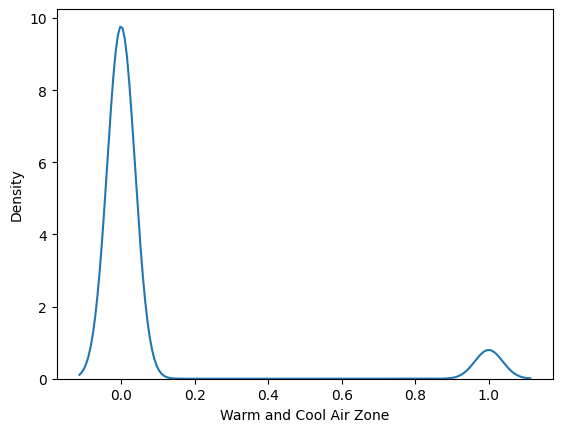

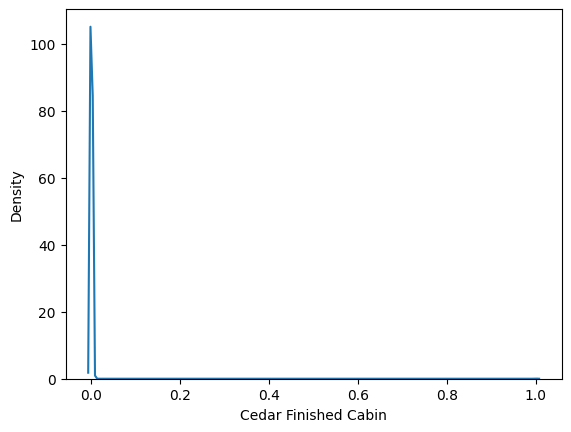

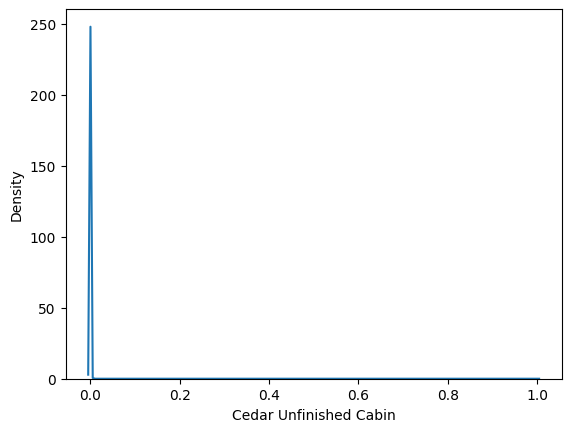

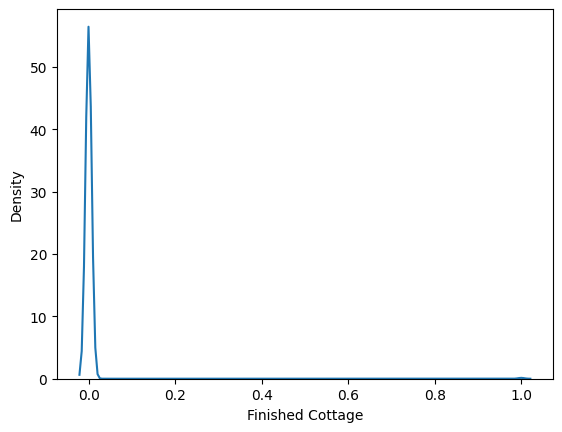

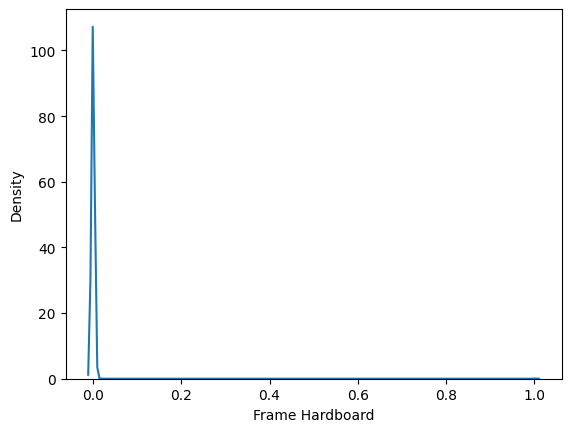

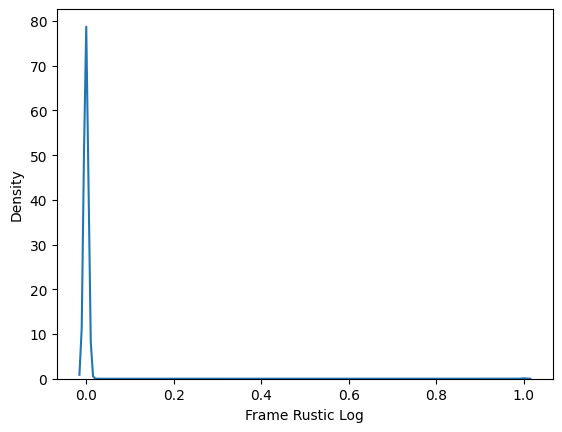

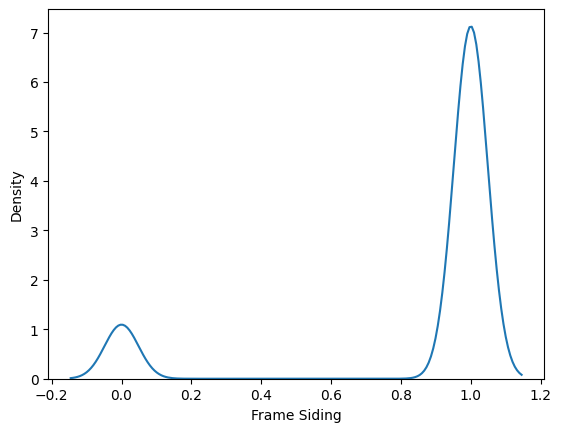

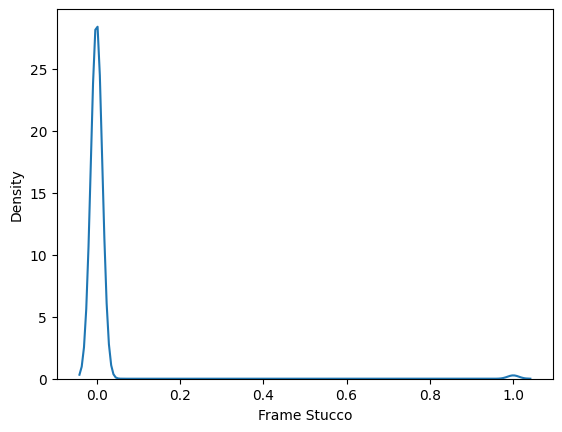

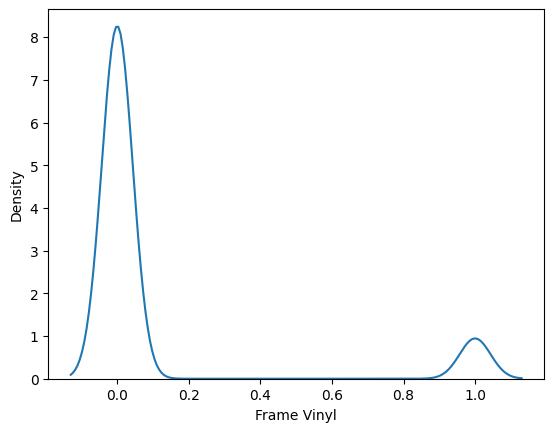

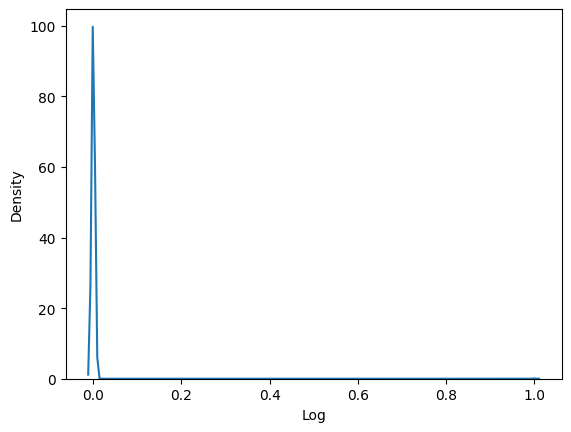

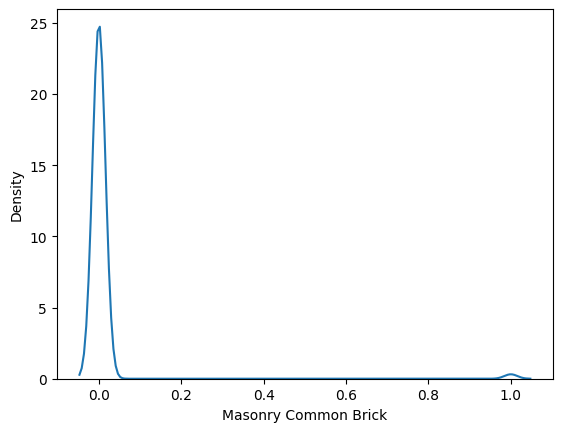

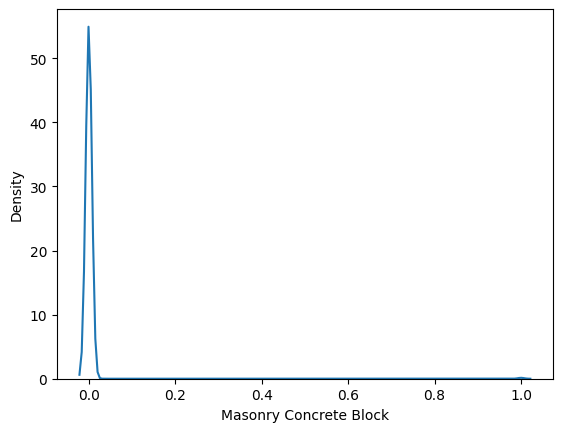

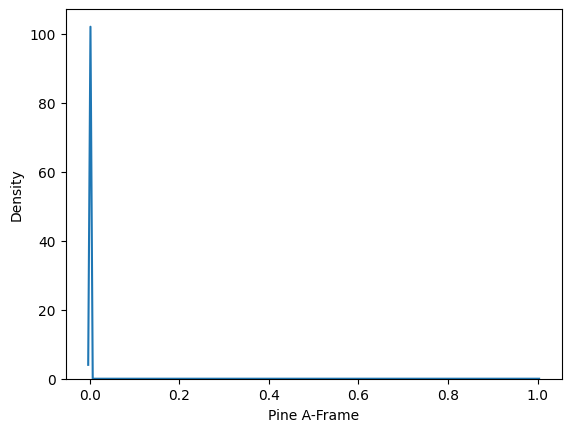

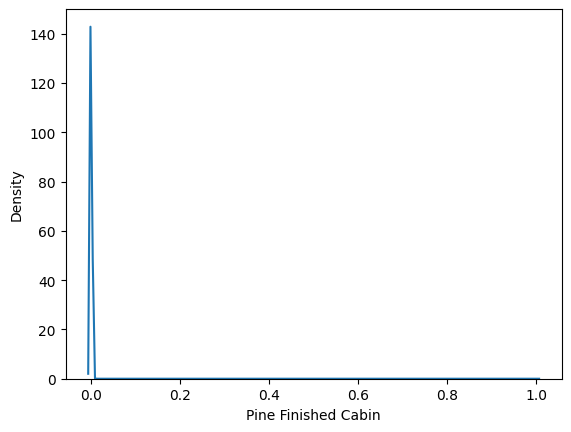

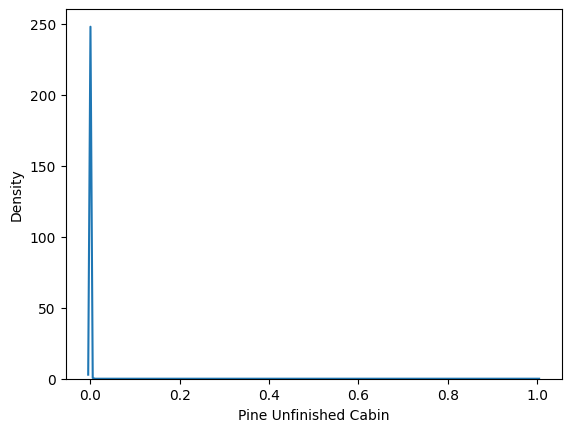

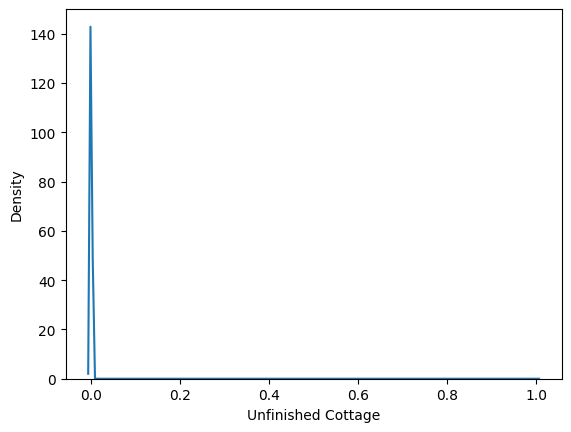

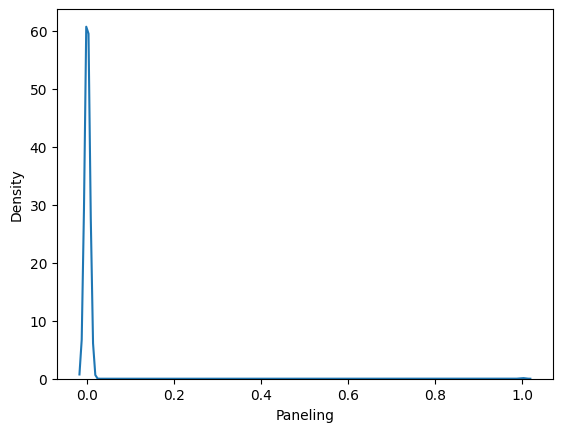

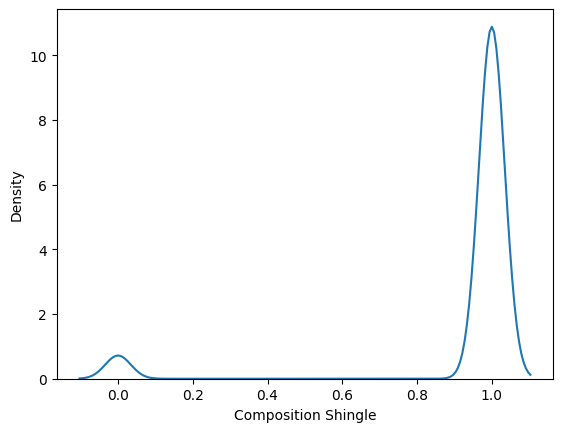

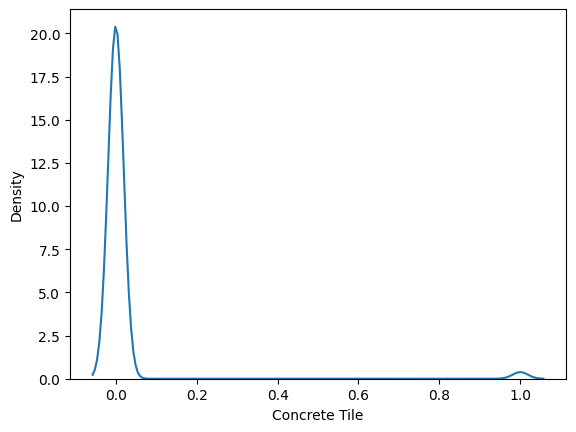

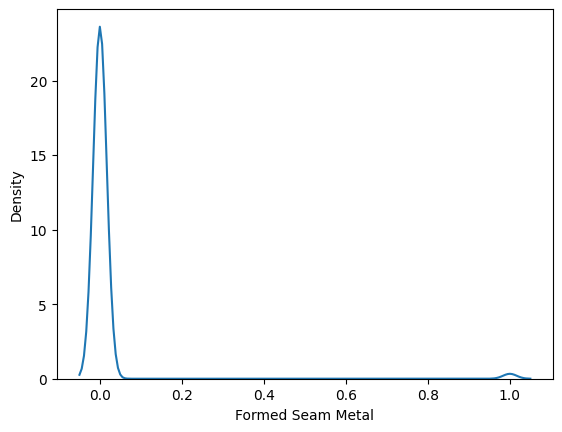

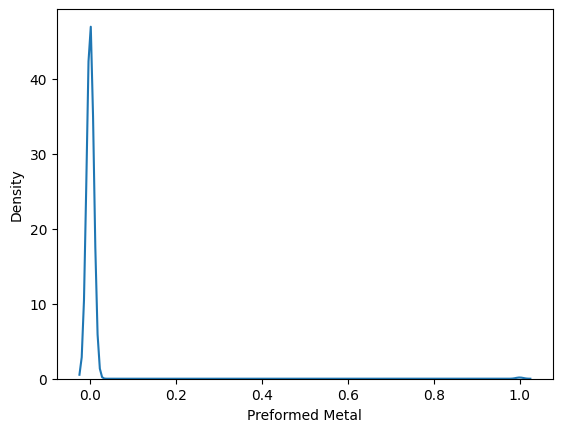

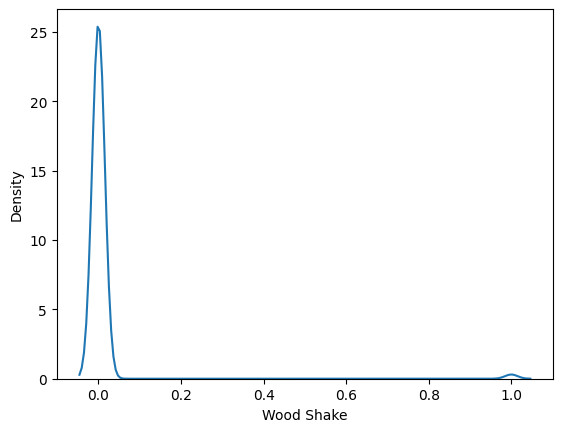

/tmp/ipykernel_8221/2181055636.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(X.iloc[:,k])


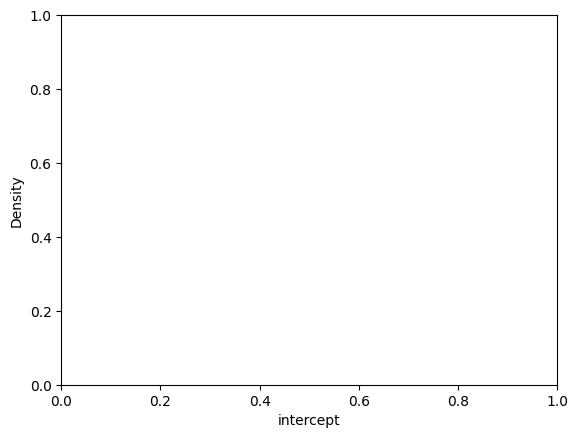

IndexError: single positional indexer is out-of-bounds

In [6]:
for k in range( df.shape[0]):
    sns.kdeplot(X.iloc[:,k])
    plt.show()

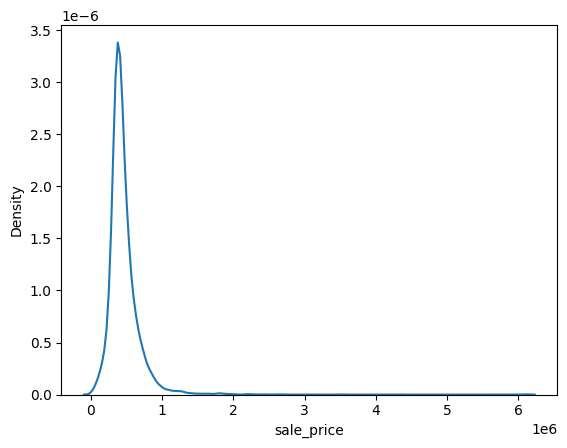

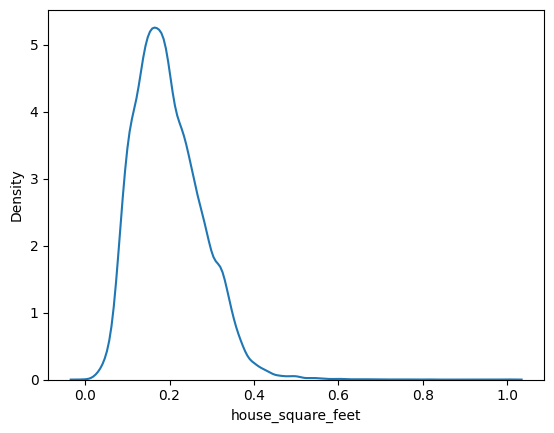

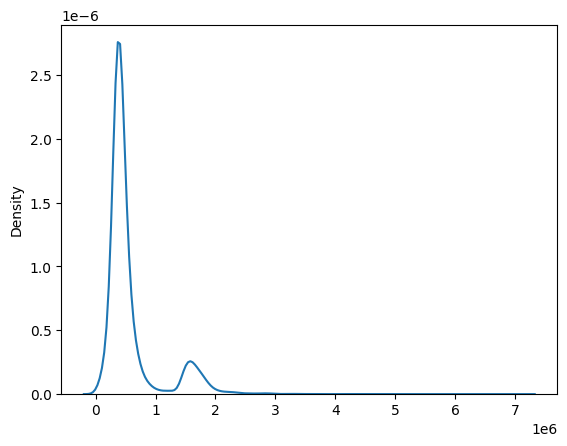

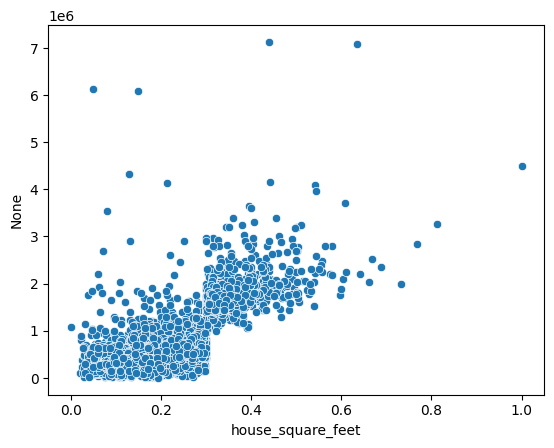

In [ ]:
#y0 = y
#y = y0

p = y
sns.kdeplot(p)
plt.show()

x = X['house_square_feet']
sns.kdeplot(x)
plt.show()


z = p + (x>.3)*1000000
sns.kdeplot(z)
plt.show()

sns.scatterplot(x=x,y=z)
plt.show()

In [9]:
X.corr()

,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,year_built,bedrooms,bathrooms,fireplaces,stories,...,Pine Finished Cabin,Pine Unfinished Cabin,Unfinished Cottage,Paneling,Composition Shingle,Concrete Tile,Formed Seam Metal,Preformed Metal,Wood Shake,intercept
house_square_feet,1.000000,-0.138098,0.000840,0.565737,-0.055445,0.534971,0.587945,0.742463,0.465621,0.555438,...,-0.027761,-0.019263,-0.030971,-0.056093,-0.059255,0.139066,-0.045559,-0.008727,0.056134,NaN
attic_finished_square_feet,-0.138098,1.000000,0.074765,-0.160113,0.075351,-0.242338,-0.039005,-0.137345,-0.035751,-0.182160,...,-0.003770,-0.002666,-0.003770,0.028549,-0.002738,0.005717,0.032208,-0.004799,-0.006376,NaN
basement_square_feet,0.000840,0.074765,1.000000,-0.164349,0.066942,-0.199809,0.108674,0.098573,0.137749,-0.121985,...,-0.006035,-0.004267,-0.006035,-0.009793,-0.116827,0.105807,0.033006,0.015213,0.018769,NaN
attached_garage_square_feet,0.565737,-0.160113,-0.164349,1.000000,-0.214052,0.631754,0.306366,0.528836,0.331326,0.304699,...,-0.019625,-0.013876,-0.019625,-0.043406,-0.041250,0.115802,-0.041825,-0.011033,0.056184,NaN
detached_garage_square_feet,-0.055445,0.075351,0.066942,-0.214052,1.000000,-0.146163,-0.067237,-0.077656,-0.005099,-0.081461,...,-0.003587,-0.002536,-0.003587,-0.006443,-0.016557,0.018251,0.025819,-0.002053,-0.012219,NaN
year_built,0.534971,-0.242338,-0.199809,0.631754,-0.146163,1.000000,0.326657,0.598564,0.253092,0.357353,...,-0.002068,-0.004243,0.003832,-0.020209,0.033116,0.032946,-0.024452,-0.027604,0.000109,NaN
bedrooms,0.587945,-0.039005,0.108674,0.306366,-0.067237,0.326657,1.000000,0.569182,0.263789,0.420779,...,-0.048083,-0.040117,-0.056738,-0.087507,0.051225,0.032039,-0.107832,-0.014937,0.003248,NaN
bathrooms,0.742463,-0.137345,0.098573,0.528836,-0.077656,0.598564,0.569182,1.000000,0.382923,0.558733,...,-0.033857,-0.030526,-0.043173,-0.063857,-0.015948,0.091768,-0.056398,-0.018863,0.041734,NaN
fireplaces,0.465621,-0.035751,0.137749,0.331326,-0.005099,0.253092,0.263789,0.382923,1.000000,0.189544,...,-0.016519,-0.007111,-0.016519,0.000778,-0.106097,0.125002,0.010037,-0.002657,0.059152,NaN
stories,0.555438,-0.182160,-0.121985,0.304699,-0.081461,0.357353,0.420779,0.558733,0.189544,1.000000,...,-0.024350,-0.001242,-0.031882,-0.032335,0.034760,0.016499,-0.036365,-0.016602,0.036719,NaN


<Axes: ylabel='Count'>

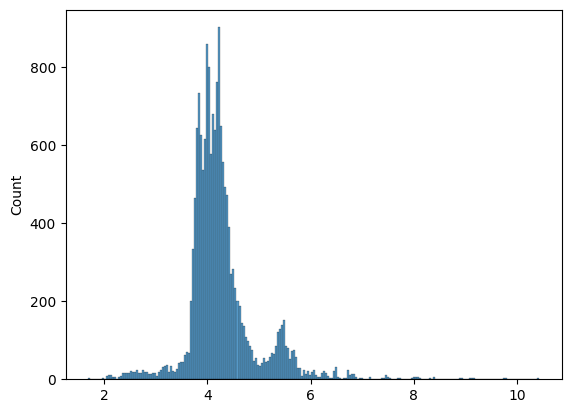

In [67]:
Z = X.drop('intercept',axis=1)
p = Z.iloc[0,:]
S = Z.iloc[1:, :]


# class mahbd:
#     ''' Mahalanobis distance from p to S. '''

#     def __init__(self, p, S):
#         self.p = p
#         self.S = S
#         self.n = len(p)

#         self.V = S.cov()
#         self.Vi = np.linalg.inv(self.V)


V = S.cov()
Vi = np.linalg.inv(V)
L = np.linalg.cholesky(Vi)

dev = (p-S)


D = [dev.iloc[i,:].T @ Vi @ dev.iloc[i,:] for i in range(dev.shape[0])]

sns.histplot( np.arcsinh(D))

#dev[0].T@Vi@dev[0]

# print( dev.shape )
# print( Vi.shape )
# print( dev.T.shape)
# #dev @ Vi @ dev.T


#A = dev @ Vi 
#A.T @ dev

Since $c$ is already a boundary point of the treatment, the sign is determined by treatment status. The running variable is negative for values "below" the cutoff, for which $a(x_j)=0$, and positive for values "above" the cutoff, for which $a(x_j)=1$.
$$
d(c,x_j) = \begin{cases}
-(c-x_j)^{\top} V^{-1} (c-x_j), & d(x_j)=0 \\
(c-x_j)^{\top} V^{-1} (c-x_j), & d(x_j)=1
\end{cases}
$$

In [45]:
L.shape

(39, 39)

In [ ]:
class npe:
    '''Non-parametric effect estimation.'''
    
    def __init__(self, d, y, c, reg = True):
        ## Inputs:
        self.d = d
        self.y = y
        self.c = c
        self.regularize = reg
        ## Derived:
        self.n = len(y)
        self.s_d = np.sqrt( np.inner(d - np.mean(d),d-np.mean(d)) / (self.n-1) )
        self.var_p = None
        self.var_m = None
        self.f_hat = None
        self.h_0 = None
        self.h_R = None
        self.h_opt = None
        self.Kc = (1-np.abs(self.d-self.c)) * (np.abs(self.d-self.c) <= 1)
        self.tfx = None

    def bwc(self):
        ''' Bandwidth compute. '''
        ## Step 1: Conditional variances
        h_1 = 1.84 * self.s_d * (self.n)**(-.2)
        n_m = np.sum( (self.d < self.c) * (self.d >= self.c - h_1) )
        n_p = np.sum( (self.d >= self.c) * ( self.d <= self.c + h_1) )
        y_bar_m = np.sum( self.y*(self.d < self.c)*(self.d >= self.c - h_1) )/n_m
        y_bar_p = np.sum( self.y*(self.d >= self.c)*(self.d <= self.c + h_1) )/n_p
        self.f_hat = (n_m + n_p)/(2 * self.n * h_1)
        dev_m = (self.y - y_bar_m) * ( self.d >= self.c - h_1) * ( self.d < self.c) 
        self.var_m = np.inner(dev_m, dev_m)/(n_m-1) 
        dev_p = (self.y - y_bar_p) * ( self.d >= self.c ) * ( self.d <= self.c + h_1) 
        self.var_p = np.inner(dev_p, dev_p)/(n_p-1) 
        ## Step 2: Second derivatives estimate
        ## m_3_c estimation 
        Z = np.vstack( (np.ones(self.n), \
                        (self.d>self.c), \
                        np.pow(self.d-self.c,2), \
                        np.pow(self.d-self.c,3)) ).T
        gamma = np.linalg.solve( Z.T @ Z, Z.T @ self.y )
        m_3_c = 6 * gamma[3]
        h_2p = 3.56 * np.power( self.var_p/(self.f_hat * m_3_c**2 ), 1/7) * np.power(n_p, -1/7)
        h_2m = 3.56 * np.power( self.var_m/(self.f_hat * m_3_c**2 ), 1/7) * np.power(n_m, -1/7)
        ## m_2_c estimation:
        # Plus side
        select_p = (self.d >= self.c) * (self.d <= self.c + h_2p)
        n_2p = np.sum(select_p)
        y_p = self.y[select_p]
        t_p = self.d[select_p] - self.c
        Z_p = np.vstack( (np.ones(len(y_p)),\
                            t_p, \
                            np.power( t_p, 2) ) ).T
        lam = np.linalg.solve( Z_p.T @ Z_p, Z_p.T @ y_p)
        m_2_p = 2 * lam[2]
        # Minus side
        select_m = (self.d >= self.c - h_2m) * (self.d < self.c )
        n_2m = np.sum(select_m)
        y_m = self.y[select_m]
        t_m = self.d[select_m] - self.c
        Z_m = np.vstack( (np.ones(len(y_m)),\
                            t_m, \
                            np.power( t_m, 2) ) ).T
        lam = np.linalg.solve( Z_m.T @ Z_m, Z_m.T @ y_m)
        m_2_m = 2 * lam[2]
        ## Regularization
        r_p = ( 2160 * self.var_p )/( n_2p * np.pow(h_2p, 4) )
        r_m = ( 2160 * self.var_m )/( n_2m * np.pow(h_2m, 4) )
        ## Bandwidth
        self.h_0 = 3.4375 * ( (self.var_p + self.var_m) / (self.f_hat*(m_2_p-m_2_m)**2) )
        self.h_R = 3.4375 * ( (self.var_p + self.var_m) / (self.f_hat*(m_2_p-m_2_m)**2+r_p+r_m) )
        if self.regularize is True:
            self.h_opt = self.h_R
        else:
            self.h_opt = self.h_0

    def est_tfx(self):
        ''' Non-parametric estimation of treatment effect. '''
        K = (1-np.abs(self.d-self.c)) * (np.abs(self.d-self.c) <= 1)
        I = (self.d >= self.c)
        Idev = I * (self.d - self.c)
        Idev_sq = I * np.power(self.d - self.c,2)
        Iy = I*self.y
        devK = (self.d - self.c) * K
        M = np.array( [ [np.inner(I,K), np.inner(Idev, K)], \
                    [np.inner(Idev,K), np.inner(Idev_sq, K)]               ] )
        b = np.array( [ np.inner(Iy, K), np.inner(Iy, devK) ])
        self.coef_p = np.linalg.solve(M,b)
        a_p = self.coef_p[0]
        #
        I = (self.d < self.c)
        Idev = I * (self.d - self.c)
        Idev_sq = I * np.power(self.d - self.c,2)
        Iy = I*self.y
        devK = (self.d - self.c) * K
        M = np.array( [ [np.inner(I,K), np.inner(Idev, K)], \
                    [np.inner(Idev,K), np.inner(Idev_sq, K)]               ] )
        b = np.array( [ np.inner(Iy, K), np.inner(Iy, devK) ])
        self.coef_m = np.linalg.solve(M,b)
        a_m = self.coef_m[0]
        #
        self.tfx = a_p - a_m

    


In [126]:
self = npe(y=z, d=x, c=.3)    
self.bwc()
self.est_tfx()
self.tfx

## Pairs bootstrap seems like the obvious thing I would do to get a sampling distribution for tfx

np.float64(968749.9501374398)

0. For a trial point, gather data.
1. Convert (X, A) to mahalonoblis distance []
2. Estimate tfx with npRDD [X]
3. Find a stochastic trust region to adjust policy (bootstrap/CI the safe region) []
4. Register a new trial point and repeat
5. Check lattice optimality

Comments:
- Issues with discounted sums and markov processes
- Issues with bootstrapping tfx with npr
- If bandwidth small, multiple points can be trialed at once

0. Unethical experimentation
1. (Local) convergence with one step policy and in the lattice case
2. 

